(15, 15)


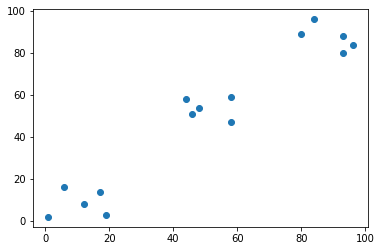

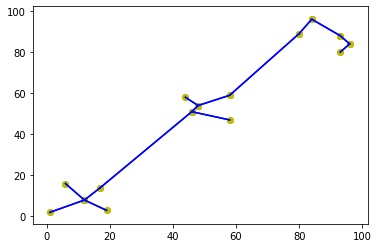

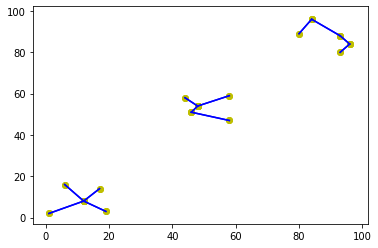

[[ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0 10  7 12  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 11  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]]
[[0, 1, 2, 3, 4], [5, 7, 8, 6, 9], [10, 13, 12, 11, 14]]


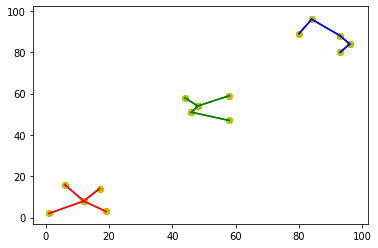

In [7]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt 
 
    
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

 
def first_connection(): 
    minim = weight[0][1] 
    i_min, j_min = 0, 1 
    for i in range(n): 
        for j in range(i + 1, n): 
            if minim > weight[i][j]: 
                minim = weight[i][j] 
                i_min, j_min = i, j 
    tree[i_min][j_min] = minim 
    tree[j_min][i_min] = minim 
    weight[i_min][j_min] = weight[j_min][i_min] = 9999999 
    connect_pnt[i_min] = connect_pnt[j_min] = 1
  
def lync_all(): 
    minim = 9999999 
    i_min, j_min = None, None 
    for i in range(n): 
        if connect_pnt[i] == 1: 
            for j in range(n): 
                if connect_pnt[j] == 0: 
                    if (minim > weight[i][j]): 
                        minim = weight[i][j] 
                        i_min, j_min = i, j 
    tree[i_min][j_min] = minim 
    tree[j_min][i_min] = minim 
    weight[i_min][j_min] = weight[j_min][i_min] = 9999999 
    connect_pnt[i_min] = connect_pnt[j_min] = 1 
 
 
def delete_connection(): 
    maxim = 0 
    i_max = j_max = 0 
    for i in range(n): 
        for j in range(i + 1, n): 
            if tree[i][j] > maxim: 
                maxim = tree[i][j] 
                i_max, j_max = i, j 
    tree[i_max][j_max] = tree[j_max][i_max] = 0 
 

def check_in_cluster(i):
    for m in range(k):
        if i in clusters[m]:
            return True
    return False

def dfs(i,cl):
    clusters[cl].append(i)
    for coherence in range(n):
        has_next = False
        if tree[i][coherence] > 0 and  tree[i][coherence] == tree[coherence][i] and not check_in_cluster(coherence):
            has_next = True
            has_next = dfs(coherence, cl)
        if coherence == n-1 and not has_next:
            return False
    return True

def cluster():
    cl = 0
    for i in range(n):
        if not check_in_cluster(i):
            fl = dfs(i, cl)
            if not fl:
                cl += 1
                
    
def get_color_by_cluster(i):
    colors = 'rgb'
    for m in range(k):
        if i in clusters[m]:
            return colors[m]
 
 
n, k = 15, 3 
part_n = int(n/k)
x = np.random.randint(1, 20, part_n)
x = np.concatenate((x, np.random.randint(40, 60, part_n)), axis=None)
x = np.concatenate((x, np.random.randint(80, 100, part_n)), axis=None)
y = np.random.randint(1, 20, part_n)
y = np.concatenate((y, np.random.randint(40, 60, part_n)), axis=None)
y = np.concatenate((y, np.random.randint(80, 100, part_n)), axis=None)
weight = [[0 for i in range(n)] for i in range(n)] 
weight = np.array(weight)
print(np.array(weight).shape)
for i in range(0, n):
    for j in range(0, n):
        weight[i][j] = dist(x[i], y[i], x[j], y[j])
        weight[j][i] = weight[i][j]
# print('Точки и расстояния между ними\n')
# print(np.array(weight), np.array(weight).shape)
plt.scatter(x, y)
plt.show()

tree = [[0 for i in range(n)] for i in range(n)] 
connect_pnt = [0 for i in range(n)] 
first_connection() 

while 0 in connect_pnt: 
    lync_all() 
# print(np.array(tree))
# print(connect_pnt)
for i in range(n):
    for j in range(n):
#         print(tree[i][j])
        if tree[i][j] > 0:
#             print(i, j)
            plt.scatter([x[i], x[j]], [y[i], y[j]], c='y')
            plt.plot([x[i], x[j]], [y[i], y[j]], c='b')
plt.show()

for i in range(k - 1): 
    delete_connection() 
# print(np.array(tree))
for i in range(n):
    for j in range(n):
#         print(tree[i][j])
        if tree[i][j] == tree[j][i] and tree[i][j] > 0:
#             print(i, j)
            plt.scatter([x[i], x[j]], [y[i], y[j]], c='y')
            plt.plot([x[i], x[j]], [y[i], y[j]], c='b')
plt.show()
print(np.array(tree))
# print(connect_pnt)
# print(weight)
clusters = [[] for i in range(k)]
cluster()
print(clusters)
for i in range(n):
    for j in range(n):
#         print(tree[i][j])
        if tree[i][j] == tree[j][i] and tree[i][j] > 0:
#             print(i, j)
            cluster_color = get_color_by_cluster(i)
            plt.scatter([x[i], x[j]], [y[i], y[j]], c='y')
            plt.plot([x[i], x[j]], [y[i], y[j]], c=cluster_color)